In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split

import picograd as pg
from picograd import Module, Variable, Linear, Dropout, relu, log_softmax, nll_loss, SGD, no_grad, train

In [3]:
from sklearn import datasets

mnist = datasets.fetch_openml(name='mnist_784')

In [4]:
X = mnist.data.to_numpy().astype(np.float64)
X = X / 255.
y = mnist.target.to_numpy().astype(np.int64)

train_X, test_X, train_y, test_y = train_test_split(
    X, y, train_size=10000, test_size=10000, shuffle=False)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((10000, 784), (10000, 784), (10000,), (10000,))

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 20 | elapsed = 195.09s | train loss = 7.166723637530129 | train acc = 0.8643000000000002 | val loss = 10.488336428448351 | val acc = 0.8169


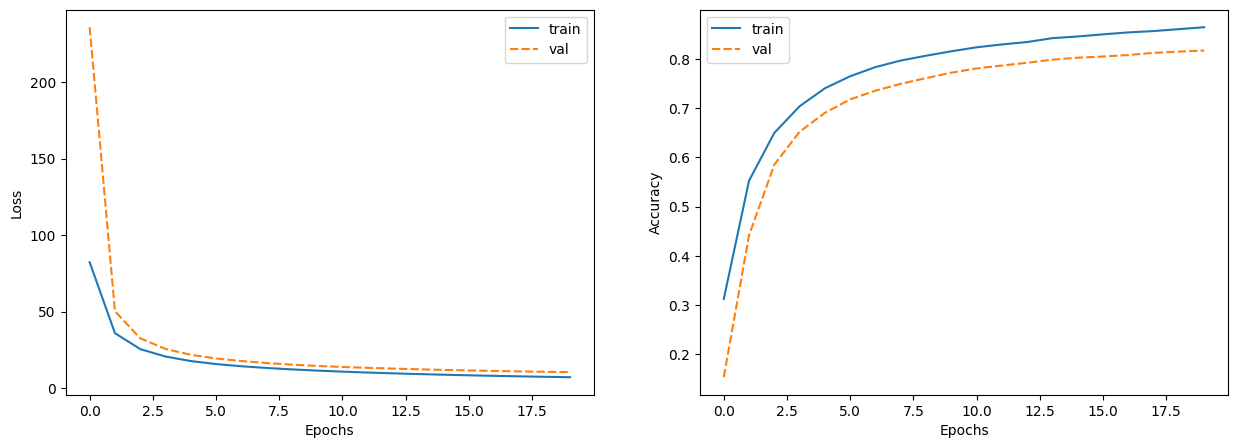

In [5]:
class Model(Module):
    def __init__(self):
        self.fc1 = Linear(784, 512)
        self.fc2 = Linear(512, 10)

    def __call__(self, x):
        x = self.fc1(x)
        x = relu(x)
        x = self.fc2(x)
        return log_softmax(x)

train_kwargs = dict(
    batch_size=50,
    max_epochs=20,
    log_iters=10,
    early_stopping_delta=1e-3,
    early_stopping_patience=3)

LR = 0.1
        
np.random.seed(0)

model0 = Model()
optim0 = SGD(model0.parameters(), lr=LR)
acc = lambda y_pred, y: np.mean(np.argmax(y_pred.view(np.ndarray), axis=1) == y.view(np.ndarray))
train(model0, train_X, train_y, nll_loss, acc, optim0, X_val=test_X, y_val=test_y, **train_kwargs)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 20 | elapsed = 196.44s | train loss = 1.6534931332626364 | train acc = 0.7981 | val loss = 1.6358751810964598 | val acc = 0.7848


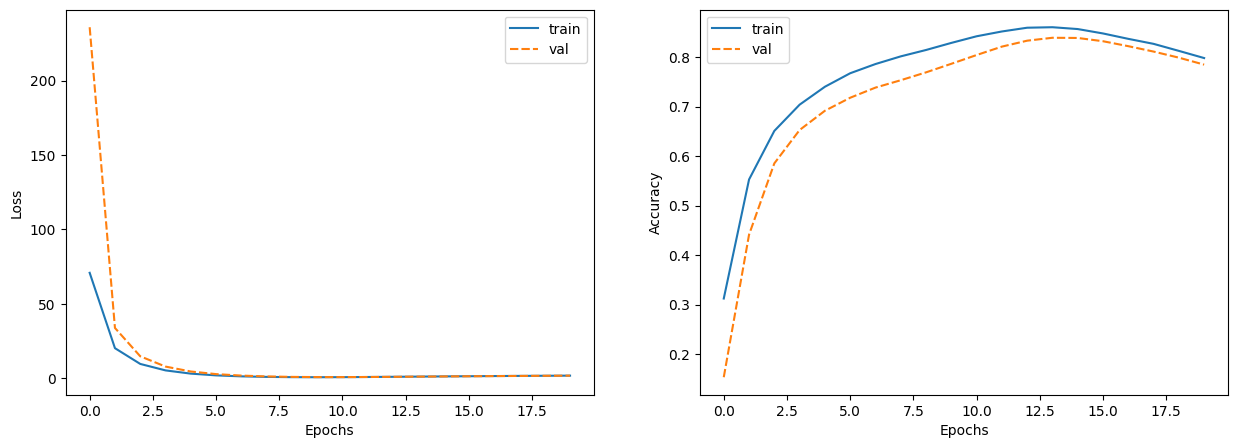

In [6]:
np.random.seed(0)

WEIGHT_DECAY = 0.01

model1 = Model()
optim1 = SGD(model1.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
train(model1, train_X, train_y, nll_loss, acc, optim1, X_val=test_X, y_val=test_y, **train_kwargs)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 20 | elapsed = 197.42s | train loss = 13.759865664170325 | train acc = 0.8224000000000001 | val loss = 10.067891545681086 | val acc = 0.8598


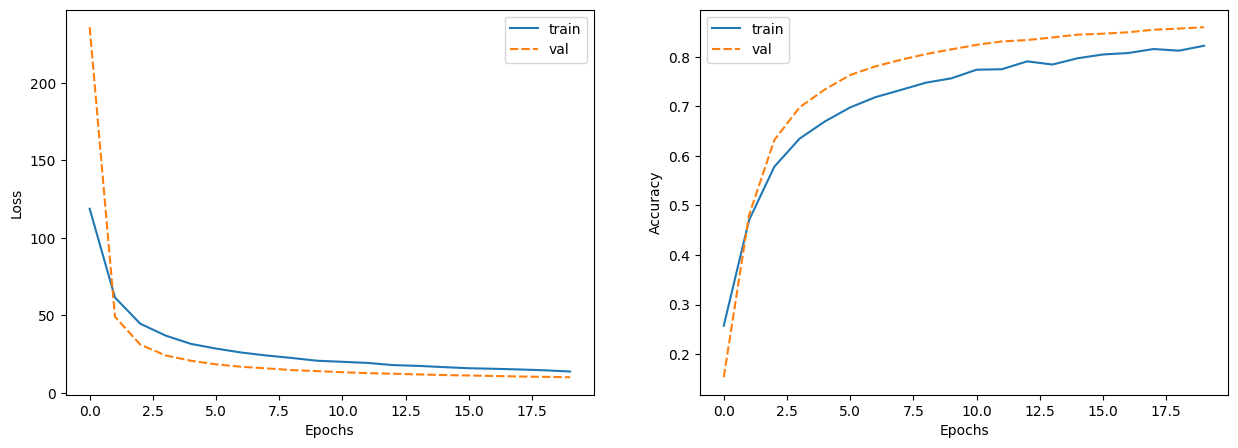

In [7]:
class ModelWithDropout(Module):
    def __init__(self, p=0.5):
        self.fc1 = Linear(784, 512)
        self.fc2 = Linear(512, 10)
        self.dropout = Dropout(p=p)

    def __call__(self, x):
        x = self.fc1(x)
        x = pg.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return pg.log_softmax(x)

np.random.seed(0)

model2 = ModelWithDropout(p=0.2)
optim2 = SGD(model2.parameters(), lr=LR)
train(model2, train_X, train_y, nll_loss, acc, optim2, X_val=test_X, y_val=test_y, **train_kwargs)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Iter:   0%|          | 0/200 [00:00<?, ?it/s]

Total epochs = 20 | elapsed = 194.27s | train loss = 1.665957443956273 | train acc = 0.7899000000000003 | val loss = 1.6467395715065272 | val acc = 0.7868


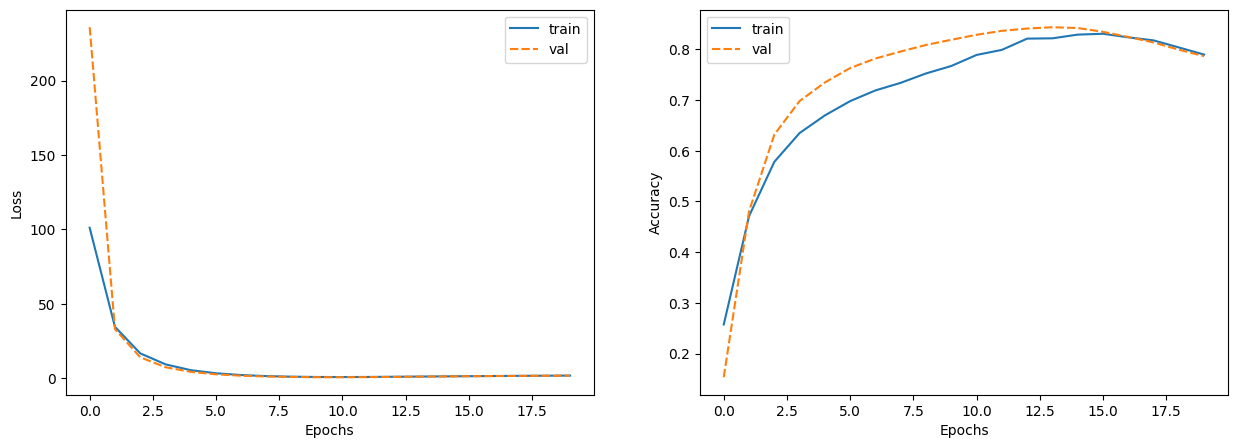

In [12]:
np.random.seed(0)

model3 = ModelWithDropout(p=0.2)
optim3 = SGD(model3.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
train(model3, train_X, train_y, nll_loss, acc, optim3, X_val=test_X, y_val=test_y, **train_kwargs)